In [1]:
import numpy as np
import pandas as pd
from pandas import Series
from pandas import DataFrame

In [9]:
# s1 = havaintoarvot
s1 = Series([18.3, 16.2, 9.7, 19.9, 17.0, 18.2, 14.7, 16.9, 10.3, 21.5,
             17.7, 11.0, 14.3, 19., 13.3, 12.9, 22.2, 20., 14.7, 9.3,
             18.3, 16.2, 17., 13.9, 16.6, 21.2, 19.6, 16.7, 17.3, 9.9,
             18., 16.7, 20.1, 15.3, 11.9, 19.3, 15.5, 14.0, 11.2, 19.7])
# Suuruusjärjestykseen:
s1.sort()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


In [10]:
s1

19     9.3
2      9.7
29     9.9
8     10.3
11    11.0
38    11.2
34    11.9
15    12.9
14    13.3
23    13.9
37    14.0
12    14.3
6     14.7
18    14.7
33    15.3
36    15.5
1     16.2
21    16.2
24    16.6
31    16.7
27    16.7
7     16.9
22    17.0
4     17.0
28    17.3
10    17.7
30    18.0
5     18.2
0     18.3
20    18.3
13    19.0
35    19.3
26    19.6
39    19.7
3     19.9
17    20.0
32    20.1
25    21.2
9     21.5
16    22.2
dtype: float64

In [18]:
# Luokkarajat
bins = [6, 9., 12., 15., 18., 21., 24., 27]
luokkien_nimet = ['[6.0-9.0[', '[9.0, 12.0[', '[12.0, 15.0[', '[15.0, 18.0[', '[18.0, 21.0[', '[21.0, 24.0[', '[24-27[']

Voin tässä mielestäni käyttää luokkarajoina ns. pyöristettyjä luokkarajoja (*bins*), sillä Pythonin Pandas-moduulin pd.cut-toiminto tulee käsittelemään luokkarajoja siten, että luokkarajat ovat ylärajaansa nähden avoimia. Ts. x lisätään luokkaan, mikäli se täyttää seuraavat kriteerit luokan_alaraja ≤ x < luokan_yläraja. Tämän olisi voinut tehdä selvemminkin ja aluksi toteutin tämän seuraavasti:

lista.sort()
lista = np.array([18.3, 16.2, 9.7, 19.9, 17.0, 18.2, 14.7, 16.9, 10.3, 21.5, 17.7, 11.0, 14.3, 19., 13.3, 12.9,
22.2, 20., 14.7, 9.3,18.3, 16.2, 17., 13.9, 16.6, 21.2, 19.6, 16.7, 17.3, 9.9,18., 16.7, 20.1, 15.3, 11.9, 19.3, 15.5, 14.0, 11.2, 19.7])

#Luodaan viisi solua sisaltava lista, eli tavallaan 5x5 matriisi, johon sitten luokittelemme harvaintoarvot.
Tämän jälkeen täytyy joko luoda vielä toinen samanlainen 5x5-matriisi, joka ei pidä sisällään alkuperäisiä havaintoarvoja vaan pelkästään tiedon siitä, montako havaintoarvoa, kuhunkin luokkaan sijoitimme.

Listoihin viitataan lukuarvoilla 0-4, eli 0, pd[0], on pd:n ensimmäinen lista ja pd[4] viides lista.         
        
Luovuin tästä lähestymistavasta siitä syystä, että pandas-moduulin hyödyntäminen oli ilmeisesti tehokkaampaa.

In [16]:
# Yläpuolella mainitsemani alkuperäinen lähestymistapa:

#lista.sort()
#lista = np.array([18.3, 16.2, 9.7, 19.9, 17.0, 18.2, 14.7, 16.9, 10.3, 21.5, 17.7, 11.0, 14.3, 19., 13.3, 12.9,
#                  22.2, 20., 14.7, 9.3,18.3, 16.2, 17., 13.9, 16.6, 21.2, 19.6, 16.7, 17.3, 9.9,18., 16.7, 20.1, 15.3, 11.9, 19.3, 15.5, 14.0, 11.2, 19.7])

#pd = [[] for _ in range(5)]
#pd1 = [[] for _ in range(5)]

#for i in lista:
#    if i <= 11.9:
#        pd[0].append(i)
#        pd[0].append
#        continue
#    elif i <= 14.9:
#        pd[1].append(i)
#        pd1[1].append(len(pd[1]))
#        continue
#    elif i <= 17.9:
#        pd[2].append(i)
#        pd1[2].append(len(pd[2]))
#        continue
#    elif i <= 20.9:
#        pd[3].append(i)
#        pd1[3].append(len(pd[3]))
#        continue
#    else:
#        pd[4].append(i)
#        pd4[4].append(len(pd[4]))

In [14]:
df = DataFrame({'frekvenssit':s1})
df

,frekvenssit
19,9.3
2,9.7
29,9.9
8,10.3
11,11.0
38,11.2
34,11.9
15,12.9
14,13.3
23,13.9


In [19]:
# Nyt kun havaintoarvot on saatu df1 nimiseen Pandasin DataFrameen, otetaan varmuuskopio nimeltä df2 ja muokataan
# jatkossa sitä:
df2 = df
 
# Nyt jaan havaintoarvot em. luokkiin. bins = luokkarajat, labels lista, johon kirjoitin luokille haluamani nimet.
# right = False tässä tärkein kohta. Sillä määrittelen, että yläraja on avoin väli eikä suljettu:
df2['luokat'] = pd.cut(df['frekvenssit'], bins, labels=luokkien_nimet, right=False)
df2

,frekvenssit,luokat
19,9.3,"[9.0, 12.0["
2,9.7,"[9.0, 12.0["
29,9.9,"[9.0, 12.0["
8,10.3,"[9.0, 12.0["
11,11.0,"[9.0, 12.0["
38,11.2,"[9.0, 12.0["
34,11.9,"[9.0, 12.0["
15,12.9,"[12.0, 15.0["
14,13.3,"[12.0, 15.0["
23,13.9,"[12.0, 15.0["


In [20]:
# Nyt vielä hankkiudutaan eroon havaintoarvoista, joita emme oikeastaan tarvitse ja otetaan niiden tilalle
# kunkin luokan lukumäärät. Tästä syystä nimesin havaintoarvot sisältävät pystysarakkeen frekvensseiksi jo heti
# alussa.

luokat
[6.0-9.0[        0
[9.0, 12.0[      7
[12.0, 15.0[     7
[15.0, 18.0[    12
[18.0, 21.0[    11
[21.0, 24.0[     3
[24-27[          0
dtype: int64

In [25]:
#Taas varmuuskopio
df3 = df2
# df7:aan viimein muutokset
df7 = df3.groupby(["luokat"], as_index=False).count()

In [26]:
df7

,luokat,frekvenssit
0,[6.0-9.0[,0
1,"[9.0, 12.0[",7
2,"[12.0, 15.0[",7
3,"[15.0, 18.0[",12
4,"[18.0, 21.0[",11
5,"[21.0, 24.0[",3
6,[24-27[,0


In [27]:
# Lasketaan suhteelliset frekvenssit:
df7['suhteellinen frekvenssi (%)'] = df7['frekvenssit']/40.*100

In [28]:
df7

,luokat,frekvenssit,suhteellinen frekvenssi (%)
0,[6.0-9.0[,0,0.0
1,"[9.0, 12.0[",7,17.5
2,"[12.0, 15.0[",7,17.5
3,"[15.0, 18.0[",12,30.0
4,"[18.0, 21.0[",11,27.5
5,"[21.0, 24.0[",3,7.5
6,[24-27[,0,0.0


In [29]:
df7['summafrekvenssi']=df7['frekvenssit'].cumsum()

In [30]:
df7

,luokat,frekvenssit,suhteellinen frekvenssi (%),summafrekvenssi
0,[6.0-9.0[,0,0.0,0
1,"[9.0, 12.0[",7,17.5,7
2,"[12.0, 15.0[",7,17.5,14
3,"[15.0, 18.0[",12,30.0,26
4,"[18.0, 21.0[",11,27.5,37
5,"[21.0, 24.0[",3,7.5,40
6,[24-27[,0,0.0,40


In [31]:
df7['suhteellinen summafrekvenssi (%)']=100*df7['summafrekvenssi']/df7['frekvenssit'].sum()

In [32]:
df7

,luokat,frekvenssit,suhteellinen frekvenssi (%),summafrekvenssi,suhteellinen summafrekvenssi (%)
0,[6.0-9.0[,0,0.0,0,0.0
1,"[9.0, 12.0[",7,17.5,7,17.5
2,"[12.0, 15.0[",7,17.5,14,35.0
3,"[15.0, 18.0[",12,30.0,26,65.0
4,"[18.0, 21.0[",11,27.5,37,92.5
5,"[21.0, 24.0[",3,7.5,40,100.0
6,[24-27[,0,0.0,40,100.0


In [35]:
# frekvenssihistogrammit teen a_bins-nimisellä muuttujalla
a_bins = df['frekvenssit'].groupby(pd.cut(df['frekvenssit'], bins)).count()

# Tarvittavat lisäosat kuvaajien piirtämiseen
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

In [38]:
# Ei anneta minkään histogrammiin palkin osua kuvaajan yläreunaan, joten lisätään seuraavat
# asetukset
pos = np.arange(len(a_bins))
width = 1.0

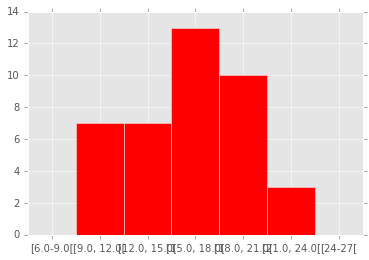

In [39]:
ax = plt.axes()
ax.set_xticks(pos + (width/2))
ax.set_xticklabels(luokkien_nimet)
plt.bar(pos, a_bins, width, color="r")
plt.show()

In [41]:
df8 = df7
df8['mi'] = ["7.5", "10.5", "13.5", "16.5", "19.5", "22.5", "25.5"]
df8

,luokat,frekvenssit,suhteellinen frekvenssi (%),summafrekvenssi,suhteellinen summafrekvenssi (%),mi
0,[6.0-9.0[,0,0.0,0,0.0,7.5
1,"[9.0, 12.0[",7,17.5,7,17.5,10.5
2,"[12.0, 15.0[",7,17.5,14,35.0,13.5
3,"[15.0, 18.0[",12,30.0,26,65.0,16.5
4,"[18.0, 21.0[",11,27.5,37,92.5,19.5
5,"[21.0, 24.0[",3,7.5,40,100.0,22.5
6,[24-27[,0,0.0,40,100.0,25.5


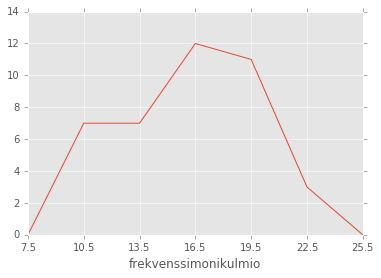

In [43]:
#mi = ["7.5", "10.5", "13.5", "16.5", "19.5", "22.5", "25.5"]
ax = df8['frekvenssit'].plot(kind='line')
ax.set_xticklabels(df8.mi)
plt.axis([0, 6, 0, 14])
plt.xlabel('frekvenssimonikulmio')

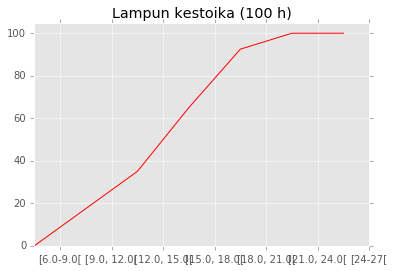

In [47]:
ax = plt.axes()
ax.set_xticks(pos + (width/2))
ax.set_xticklabels(luokkien_nimet)
plt.axis([0, 6.5, 0, 105])
plt.plot(df7["suhteellinen summafrekvenssi (%)"], color="r")
plt.title("Lampun kestoika (100 h)")
plt.show()


In [48]:
import statistics
print(statistics.median(s1))

16.7


StatisticsError: no unique mode; found 10 equally common values